# **ERASERHEADS DATA ANALYSIS**

The Eraserheads, often referred to as the *"Beatles of the Philippines,"* are a legendary Filipino rock band that rose to prominence in the 1990s.

They formed at University of the Philippines in 1989 by the schoolmates **Ely Buendia** (lead vocals, guitar), **Marcus Adoro** (lead guitars), **Buddy Zabala** (bass), and **Raymund Marasigan** (drums) as they played covers at several universities.

### Column Descriptions

1. **acousticness**: A value between 0.0 and 1.0 that represents the acoustic nature of the track, with higher values indicating more acoustic sounds.

2. **album_name**: The name of the album that the track is on.

3. **album_release_date**: The date the album (format: YYYY-MM-DD) was released.

4. **artist_name**: Eraserheads

5. **danceability**: A number from 0.0 to 1.0 that indicates how well a track is suited for dancing (tempo, rhythm stability, beat strength, etc.)

6. **duration_ms**: The time in milliseconds of the track.

7. **energy**: A value between 0.0 and 1.0 indicating how intense and active the track is.

8. **instrumentalness**: Tells whether a track has vocals. The closer the value is to 1.0, the more likely the track is instrumental.

9. **liveness**: A score between 0.0 and 1.0 that detects the presence of an audience in the recording. The higher values mean more live performance characteristics.

10. **loudness**: Averaged across the track in decibels (dB) of the overall loudness of the track.

11. **lyrics_cleaned**: The lyrics, stripped of special characters or formatting, a cleaned version.

12. **lyrics_full**: The full lyrics of the track, including any other text (repetitions, etc.).

13. **popularity**: A popularity score (from Spotify) between 0 and 100, representing the track's popularity at a particular moment.

14. **spotify_url**: A direct link to the track on Spotify.

15. **speechiness**: A number between 0.0 and 1.0 indicating the presence of spoken words in a track. The more spoken content, the higher values.

16. **tempo**: The BPM of the track.

17. **track_name**: The name of the track/song.

18. **track_release_date**: The format (YYYY-MM-DD) of the release date of the track.

19. **valence**: A number from 0.0 to 1.0 indicating the musical positiveness of a track. The higher the value, the more positive (happy, cheerful) the tracks.

### Questions:

**1. What are their top 10 most popular tracks?**

**2. What are the differences between their live and studio recordings in terms of musical features?**

**3. Which musical features make their songs popular?**

**4. How do their song lyrics reflect emotional sentiment?**

**5. How Eraserheads' musical features changed overtime?**

**6. What are the frequent words used in their overall song lyrics?**


### Importing necessary libraries

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import datetime as dt
from textblob import TextBlob
from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
from wordcloud import WordCloud, STOPWORDS

In [264]:
warnings.filterwarnings("ignore")

In [265]:
df = pd.read_csv(r'C:\Users\dioqu\Desktop\Data_Analysis_Projects\Eraser_Heads\eraserheads_df.csv')
df

,artist_name,album_name,album_release_date,track_name,track_release_date,duration_ms,popularity,danceability,energy,acousticness,instrumentalness,valence,tempo,liveness,loudness,speechiness,audio_type,lyrics_full,lyrics_cleaned,spotify_url
0,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Superproxy - Live at 2022 The Eraserheads Reun...,15/03/2024,374496,28,0.420,0.970,0.000092,0.025900,0.367,133.010,0.5770,-6.898,0.0943,live,Not available,Not available,https://open.spotify.com/track/3kyY3L6eGEPjXLm...
1,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Back2me - Live at 2022 The Eraserheads Reunion...,15/03/2024,224395,27,0.298,0.960,0.000167,0.001320,0.235,112.100,0.3550,-6.814,0.1590,live,Not available,Not available,https://open.spotify.com/track/41HHuTilekHAaZO...
2,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Waiting For The Bus - Live at 2022 The Eraserh...,15/03/2024,223813,24,0.351,0.935,0.003100,0.000000,0.543,132.927,0.0916,-7.367,0.0835,live,Not available,Not available,https://open.spotify.com/track/0xCznl1AvGIUaLc...
3,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Fine Time - Live at 2022 The Eraserheads Reuni...,15/03/2024,191688,23,0.175,0.937,0.033100,0.000002,0.522,188.178,0.3780,-6.734,0.1230,live,Not available,Not available,https://open.spotify.com/track/231Z4IJKcO2uzCJ...
4,Eraserheads,Huling El Bimbo (Live at 2022 The Eraserheads ...,22/12/2022,Kamasupra - Live at 2022 The Eraserheads Reuni...,15/03/2024,284753,23,0.396,0.944,0.000047,0.200000,0.444,129.247,0.2200,-6.592,0.0663,live,Not available,Not available,https://open.spotify.com/track/3AAUgFNRwdStgo8...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Eraserheads,Anthology,26/01/2004,Run Barbi Run,23/01/2004,174200,20,0.482,0.930,0.054200,0.000197,0.363,107.148,0.0914,-8.995,0.0331,studio,Nagdedeliver lang naman siya ng pizza\nDi sina...,Nagdedeliver lang naman siya ng pizza\nDi sina...,https://open.spotify.com/track/5JRwSnjp8bip417...
283,Eraserheads,Anthology,26/01/2004,Police Woman,1/6/2004,307480,16,0.658,0.445,0.573000,0.000003,0.472,125.925,0.1330,-13.552,0.0695,studio,Police woman\nPolice woman\nNadakip mo ang pus...,Police woman\nPolice woman\nNadakip mo ang pus...,https://open.spotify.com/track/5U8gOl7DuQLcIoi...
284,Eraserheads,Anthology,26/01/2004,Tamagotchi Baby,23/01/2004,279253,20,0.652,0.770,0.002030,0.001130,0.850,134.956,0.3460,-7.395,0.0267,studio,"Tamagotchi baby, baby you're the one\nThat shi...","Tamagotchi baby, baby you're the one\nThat shi...",https://open.spotify.com/track/5PWrgvlfFYE2NOd...
285,Eraserheads,Anthology,26/01/2004,Harana,1/1/1997,365160,49,0.412,0.678,0.032000,0.000307,0.590,130.711,0.1110,-10.837,0.0307,studio,[Chorus]\n'Wag nang malumbay\nAng pag-ibig ko ...,\n'Wag nang malumbay\nAng pag-ibig ko ay tunay...,https://open.spotify.com/track/0aui1glEVwPzUIK...


In [266]:
# drop duplicates, if any
df.drop_duplicates(inplace=True)


In [267]:
df.describe()

,duration_ms,popularity,danceability,energy,acousticness,instrumentalness,valence,tempo,liveness,loudness,speechiness
count,287.000000,287.000000,287.000000,285.000000,285.000000,285.000000,285.000000,285.000000,287.000000,287.000000,287.000000
mean,235839.787456,29.034843,0.485760,0.659230,0.220807,0.048489,0.561368,126.642825,0.283140,-11.433202,0.088385
std,84952.115605,15.153486,0.142589,0.208169,0.278349,0.154658,0.231494,28.054161,0.227359,3.996712,0.155988
min,18906.000000,0.000000,0.158000,0.046400,0.000006,0.000000,0.000000,0.000000,0.052100,-31.176000,0.023900
25%,189086.500000,18.000000,0.378000,0.520000,0.010400,0.000000,0.381000,110.049000,0.125000,-13.345000,0.032750
50%,245173.000000,26.000000,0.471000,0.678000,0.074600,0.000015,0.558000,129.885000,0.197000,-11.694000,0.046000
75%,279516.000000,37.500000,0.593000,0.810000,0.364000,0.001870,0.733000,144.218000,0.346000,-7.908000,0.068800
max,573149.000000,67.000000,0.970000,0.990000,0.993000,0.980000,0.972000,188.178000,0.989000,-4.944000,0.921000


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         287 non-null    object 
 1   album_name          287 non-null    object 
 2   album_release_date  287 non-null    object 
 3   track_name          287 non-null    object 
 4   track_release_date  287 non-null    object 
 5   duration_ms         287 non-null    int64  
 6   popularity          287 non-null    int64  
 7   danceability        287 non-null    float64
 8   energy              285 non-null    float64
 9   acousticness        285 non-null    float64
 10  instrumentalness    285 non-null    float64
 11  valence             285 non-null    float64
 12  tempo               285 non-null    float64
 13  liveness            287 non-null    float64
 14  loudness            287 non-null    float64
 15  speechiness         287 non-null    float64
 16  audio_ty

In [269]:
def str_dtype(arg):
    df[arg] = df[arg].astype('string')

str_dtype('album_name')
str_dtype('track_name')
str_dtype('audio_type')
str_dtype('lyrics_full')
str_dtype('lyrics_cleaned')
str_dtype('spotify_url')

We have identified that there are 8 values in track_release_date where they have year value only (e.g. 1994), we should consider it in conversion and extraction of year to track_release_year

In [270]:
def dt_dtype(arg):
    # First, replace year-only entries with a proper datetime format
    # Convert 'year' to '01/01/year' to allow correct conversion
    df[arg] = df[arg].apply(lambda x: f'01/01/{x}' if len(x) == 4 and x.isdigit() else x)
    df[arg] = pd.to_datetime(df[arg], errors='coerce', infer_datetime_format=True)

# Convert 'album_release_date' to datetime and extract the year
dt_dtype('album_release_date')
df['album_release_year'] = df['album_release_date'].dt.year

# Convert 'track_release_date' to datetime and extract the year
dt_dtype('track_release_date')
df['track_release_year'] = df['track_release_date'].dt.year

# Convert the year columns to integer type
df['album_release_year'] = df['album_release_year'].astype('Int64') 
df['track_release_year'] = df['track_release_year'].astype('Int64')



In [271]:
# Conversion of milliseconds to minutes
df['duration_minutes'] = df['duration_ms'] / 60000

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   artist_name         287 non-null    object        
 1   album_name          287 non-null    string        
 2   album_release_date  287 non-null    datetime64[ns]
 3   track_name          287 non-null    string        
 4   track_release_date  287 non-null    datetime64[ns]
 5   duration_ms         287 non-null    int64         
 6   popularity          287 non-null    int64         
 7   danceability        287 non-null    float64       
 8   energy              285 non-null    float64       
 9   acousticness        285 non-null    float64       
 10  instrumentalness    285 non-null    float64       
 11  valence             285 non-null    float64       
 12  tempo               285 non-null    float64       
 13  liveness            287 non-null    float64       

In [273]:
df.describe()

,album_release_date,track_release_date,duration_ms,popularity,danceability,energy,acousticness,instrumentalness,valence,tempo,liveness,loudness,speechiness,album_release_year,track_release_year,duration_minutes
count,287,287,287.000000,287.000000,287.000000,285.000000,285.000000,285.000000,285.000000,285.000000,287.000000,287.000000,287.000000,287.0,287.0,287.000000
mean,2005-11-18 22:54:46.411149824,2006-07-04 22:44:44.320557440,235839.787456,29.034843,0.485760,0.659230,0.220807,0.048489,0.561368,126.642825,0.283140,-11.433202,0.088385,2005.226481,2005.97561,3.930663
min,1993-07-01 00:00:00,1954-03-04 00:00:00,18906.000000,0.000000,0.158000,0.046400,0.000006,0.000000,0.000000,0.000000,0.052100,-31.176000,0.023900,1993.0,1954.0,0.315100
25%,1997-04-24 12:00:00,1995-12-21 00:00:00,189086.500000,18.000000,0.378000,0.520000,0.010400,0.000000,0.381000,110.049000,0.125000,-13.345000,0.032750,1996.5,1995.0,3.151442
50%,2004-01-26 00:00:00,2003-06-10 00:00:00,245173.000000,26.000000,0.471000,0.678000,0.074600,0.000015,0.558000,129.885000,0.197000,-11.694000,0.046000,2004.0,2003.0,4.086217
75%,2018-11-23 00:00:00,2020-05-19 12:00:00,279516.000000,37.500000,0.593000,0.810000,0.364000,0.001870,0.733000,144.218000,0.346000,-7.908000,0.068800,2018.0,2019.5,4.658600
max,2022-12-22 00:00:00,2024-09-09 00:00:00,573149.000000,67.000000,0.970000,0.990000,0.993000,0.980000,0.972000,188.178000,0.989000,-4.944000,0.921000,2022.0,2024.0,9.552483
std,NaN,NaN,84952.115605,15.153486,0.142589,0.208169,0.278349,0.154658,0.231494,28.054161,0.227359,3.996712,0.155988,10.079453,12.600759,1.415869


### Handling Missing Values

In [274]:
# Calculate the number of missing values for each column
missing_values = df.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the missing values
print(missing_values)


energy              2
acousticness        2
instrumentalness    2
valence             2
tempo               2
dtype: int64


In [275]:
df[df['energy'].isnull()]

,artist_name,album_name,album_release_date,track_name,track_release_date,duration_ms,popularity,danceability,energy,acousticness,...,liveness,loudness,speechiness,audio_type,lyrics_full,lyrics_cleaned,spotify_url,album_release_year,track_release_year,duration_minutes
210,Eraserheads,Circus,1994-11-04,Punk Zappa,1994-11-01,111333,18,0.66,NaN,NaN,...,0.835,-14.687,0.84,studio,[Spoken] Oy! I'm Punk Zappa And my hobbies are...,Oy! I'm Punk Zappa And my hobbies are listeni...,https://open.spotify.com/track/5JvXHaqchNppElX...,1994,1994,1.85555
228,Eraserheads,Circus: The Bernie Grundman Remaster 2022,2022-11-30,Punk Zappa,1994-11-01,111333,18,0.66,NaN,NaN,...,0.835,-14.687,0.84,studio,[Spoken] Oy! I'm Punk Zappa And my hobbies are...,Oy! I'm Punk Zappa And my hobbies are listeni...,https://open.spotify.com/track/5JvXHaqchNppElX...,2022,1994,1.85555


There are 10 identified missing values with the same rows of the following columns:
- energy - 2
- acousticness - 2
- instrumentalness - 2
- valence - 2
- tempo - 2

Since this dataset was scraped from Spotify, these missing values are not informative and is hard to investigate, therefore, we should handle this by using simple approach through checking their distribution and fill each with mean or median based on the result rather than dropping them or using advanced approach as they only make up 0.7% of the overall data.


### Skewness and Missing Value Handling ###

Skewness of Energy: -0.5918
 - Using Median to fill missing values for Energy.
Skewness of Acousticness: 1.3162
 - Using Median to fill missing values for Acousticness.
Skewness of Instrumentalness: 4.1286
 - Using Median to fill missing values for Instrumentalness.
Skewness of Valence: -0.0722
 - Using Mean to fill missing values for Valence.
Skewness of Tempo: -0.4288
 - Using Mean to fill missing values for Tempo.


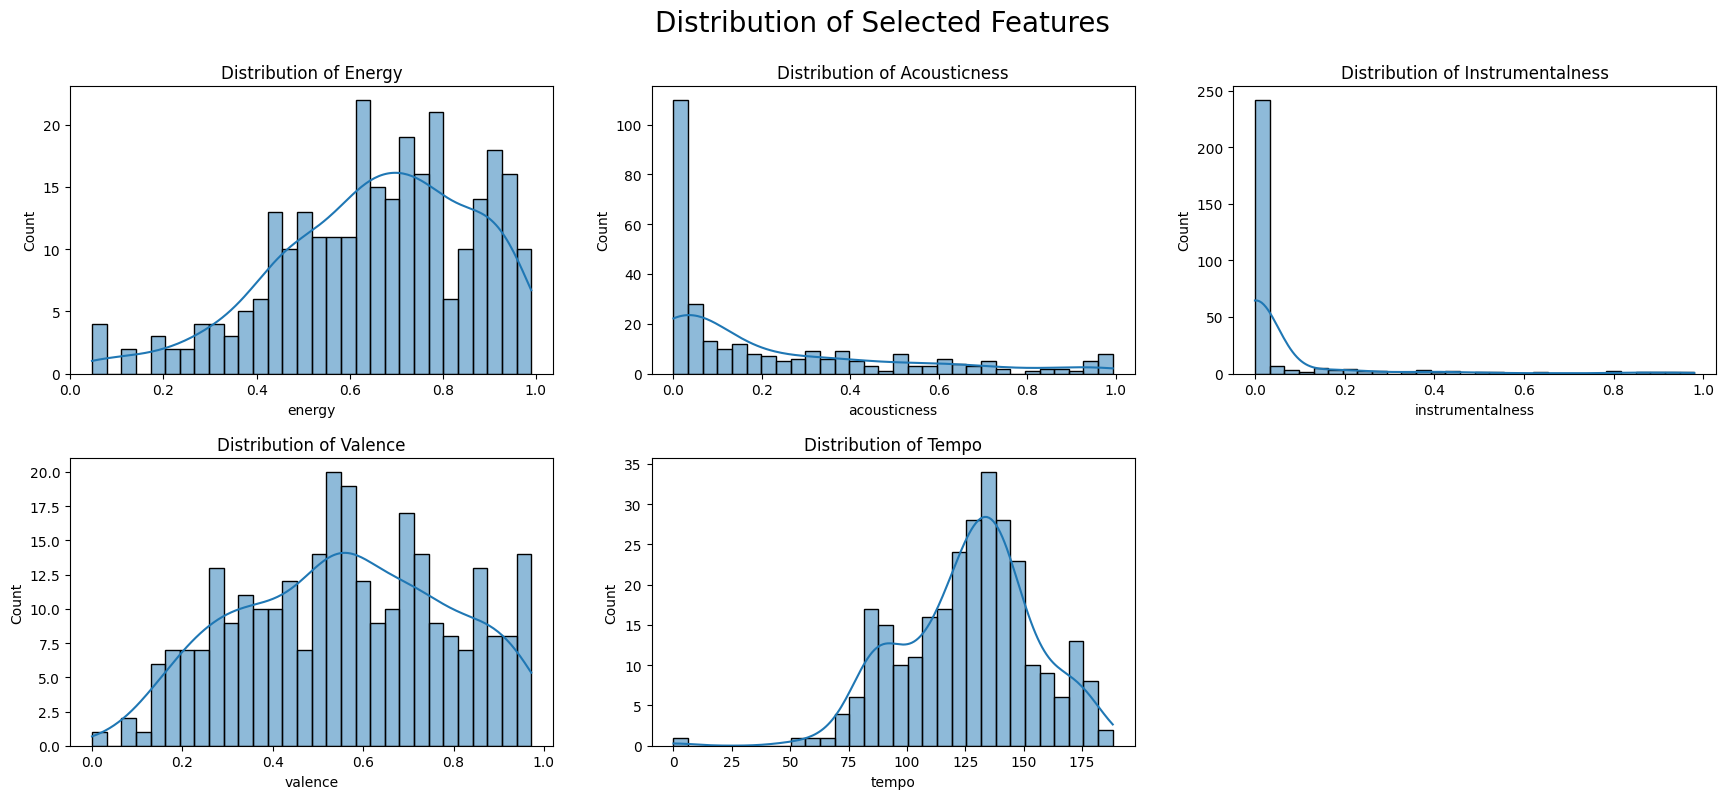

In [276]:
def visualize_and_fillna(df, columns):
    # Define the number of rows for a 3-column layout
    num_columns = 3
    num_rows = (len(columns) + num_columns - 1) // num_columns  
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 4))
    fig.tight_layout(pad=4.0) 

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Overall title
    plt.suptitle('Distribution of Selected Features', fontsize=20, y=1.02)

    print("\n### Skewness and Missing Value Handling ###\n")

    for i, column in enumerate(columns):
        # Visualize the distribution
        sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column.capitalize()}')

        # Calculate skewness
        skewness = df[column].skew()
        print(f"Skewness of {column.capitalize()}: {skewness:.4f}")

        # Check if skewness suggests using mean or median
        if skewness < -0.5 or skewness > 0.5:
            # Use median for skewed data
            df[column].fillna(df[column].median(), inplace=True)
            print(f" - Using Median to fill missing values for {column.capitalize()}.")
        else:
            # Use mean for normal data
            df[column].fillna(df[column].mean(), inplace=True)
            print(f" - Using Mean to fill missing values for {column.capitalize()}.")

    # Hide any empty subplots (if columns < grid spaces)
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.show()

# Apply the function to different columns
visualize_and_fillna(df, ['energy', 'acousticness', 'instrumentalness', 'valence', 'tempo'])

In [277]:
# Checking if all columns have still missing values
if df.isnull().sum().sum() == 0:
    print("All columns have no missing values, data is clean.")
else:
    print("There are still missing values.")


All columns have no missing values, data is clean.


### Data Analysis and Visualization

# **1. What are their top 10 most popular tracks?**

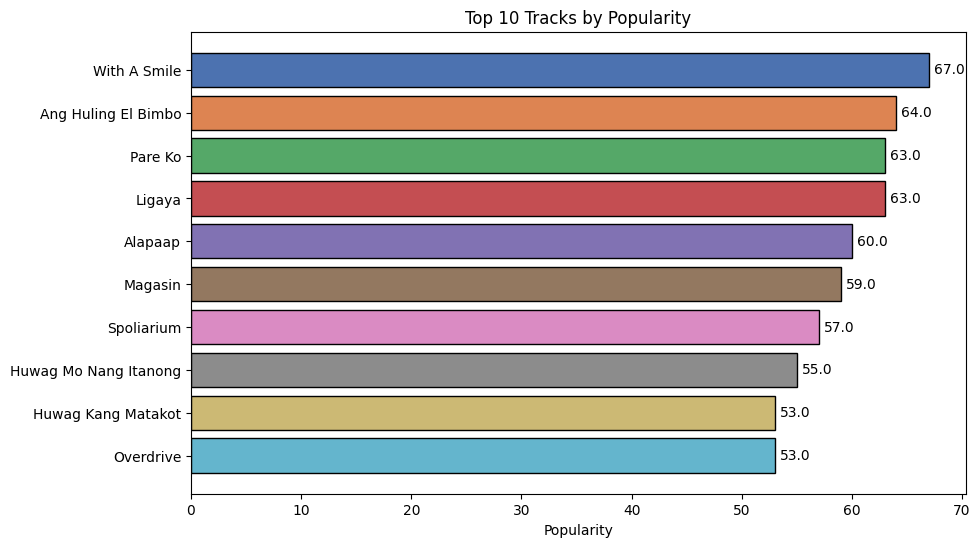

In [278]:
top_10_tracks = df.sort_values(by='popularity', ascending=False).drop_duplicates('track_name').head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_tracks['track_name'], top_10_tracks['popularity'], 
                 color=sns.color_palette("deep", n_colors=10))

plt.xlabel('Popularity')
plt.title('Top 10 Tracks by Popularity')
plt.gca().invert_yaxis()

# Adding labels with an offset
for bar in bars:
    plt.text(bar.get_width() + 0.45, bar.get_y() + bar.get_height()/2,  # Added a small offset
             f'{bar.get_width():.1f}', va='center')

# Adding borders to the bars
for bar in bars:
    bar.set_edgecolor('black')  # Set border color
    bar.set_linewidth(1)         # Set border width

plt.show()


Based on the average popularity score, "With A Smile" achieved significantly higher popularity (67) than the other tracks.

### Overall Popularity Trend

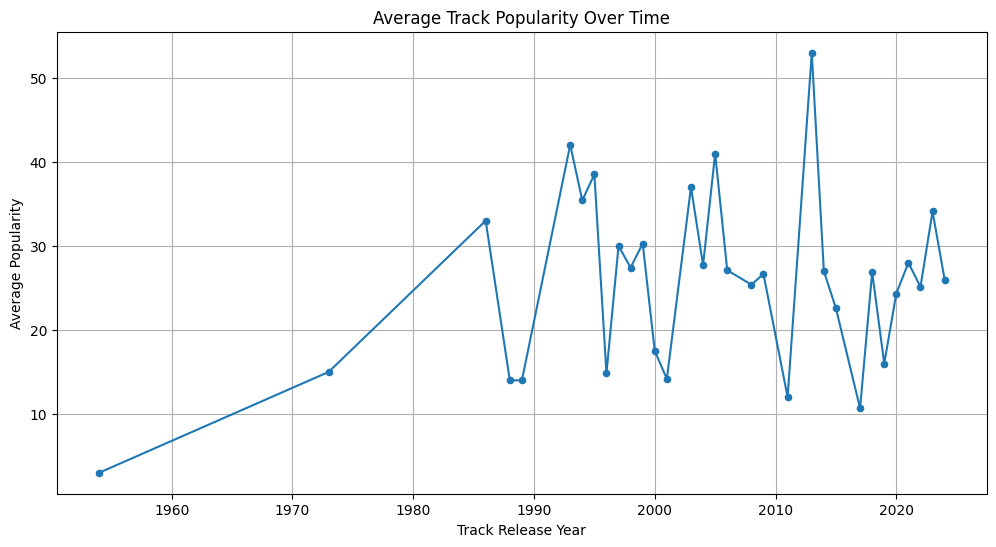

In [279]:
average_popularity = df.groupby('track_release_year')['popularity'].mean()

# Create line plot with markers
plt.figure(figsize=(12, 6))
average_popularity.plot(kind='line', marker='o', markersize=4.5) 

plt.title('Average Track Popularity Over Time')
plt.xlabel('Track Release Year')
plt.ylabel('Average Popularity')
plt.grid(axis='y')
plt.grid(axis="x")


plt.show()

Eraserheads' music has gained popularity in a general upward trend observed in the late 90s, a significant peak between 2011-2013, but in a flunctating manner.

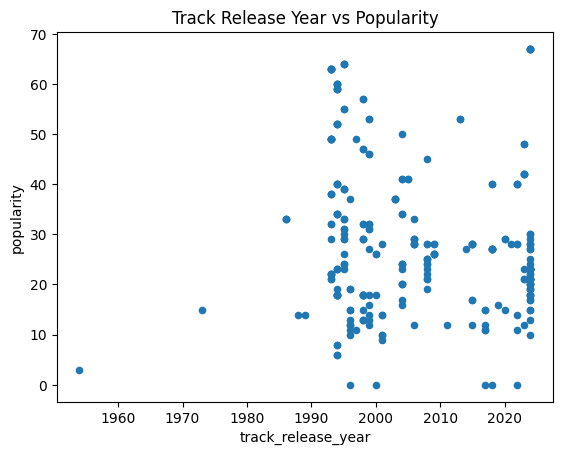

In [280]:
df.plot.scatter(x='track_release_year', y='popularity')
plt.title('Track Release Year vs Popularity')
plt.show()


There is no clear relationship between track release year and popularity.
Eraserheads' most popular tracks were likely released during the 90s and early 2000s which explains the data point clustering in-between.

# **2. What are the differences between their live and studio recordings in terms of musical features?**

In [281]:
# Separate live and studio tracks
live_tracks = df[df['audio_type'] == 'live']
studio_tracks = df[df['audio_type'] == 'studio']


### Using Density Plot

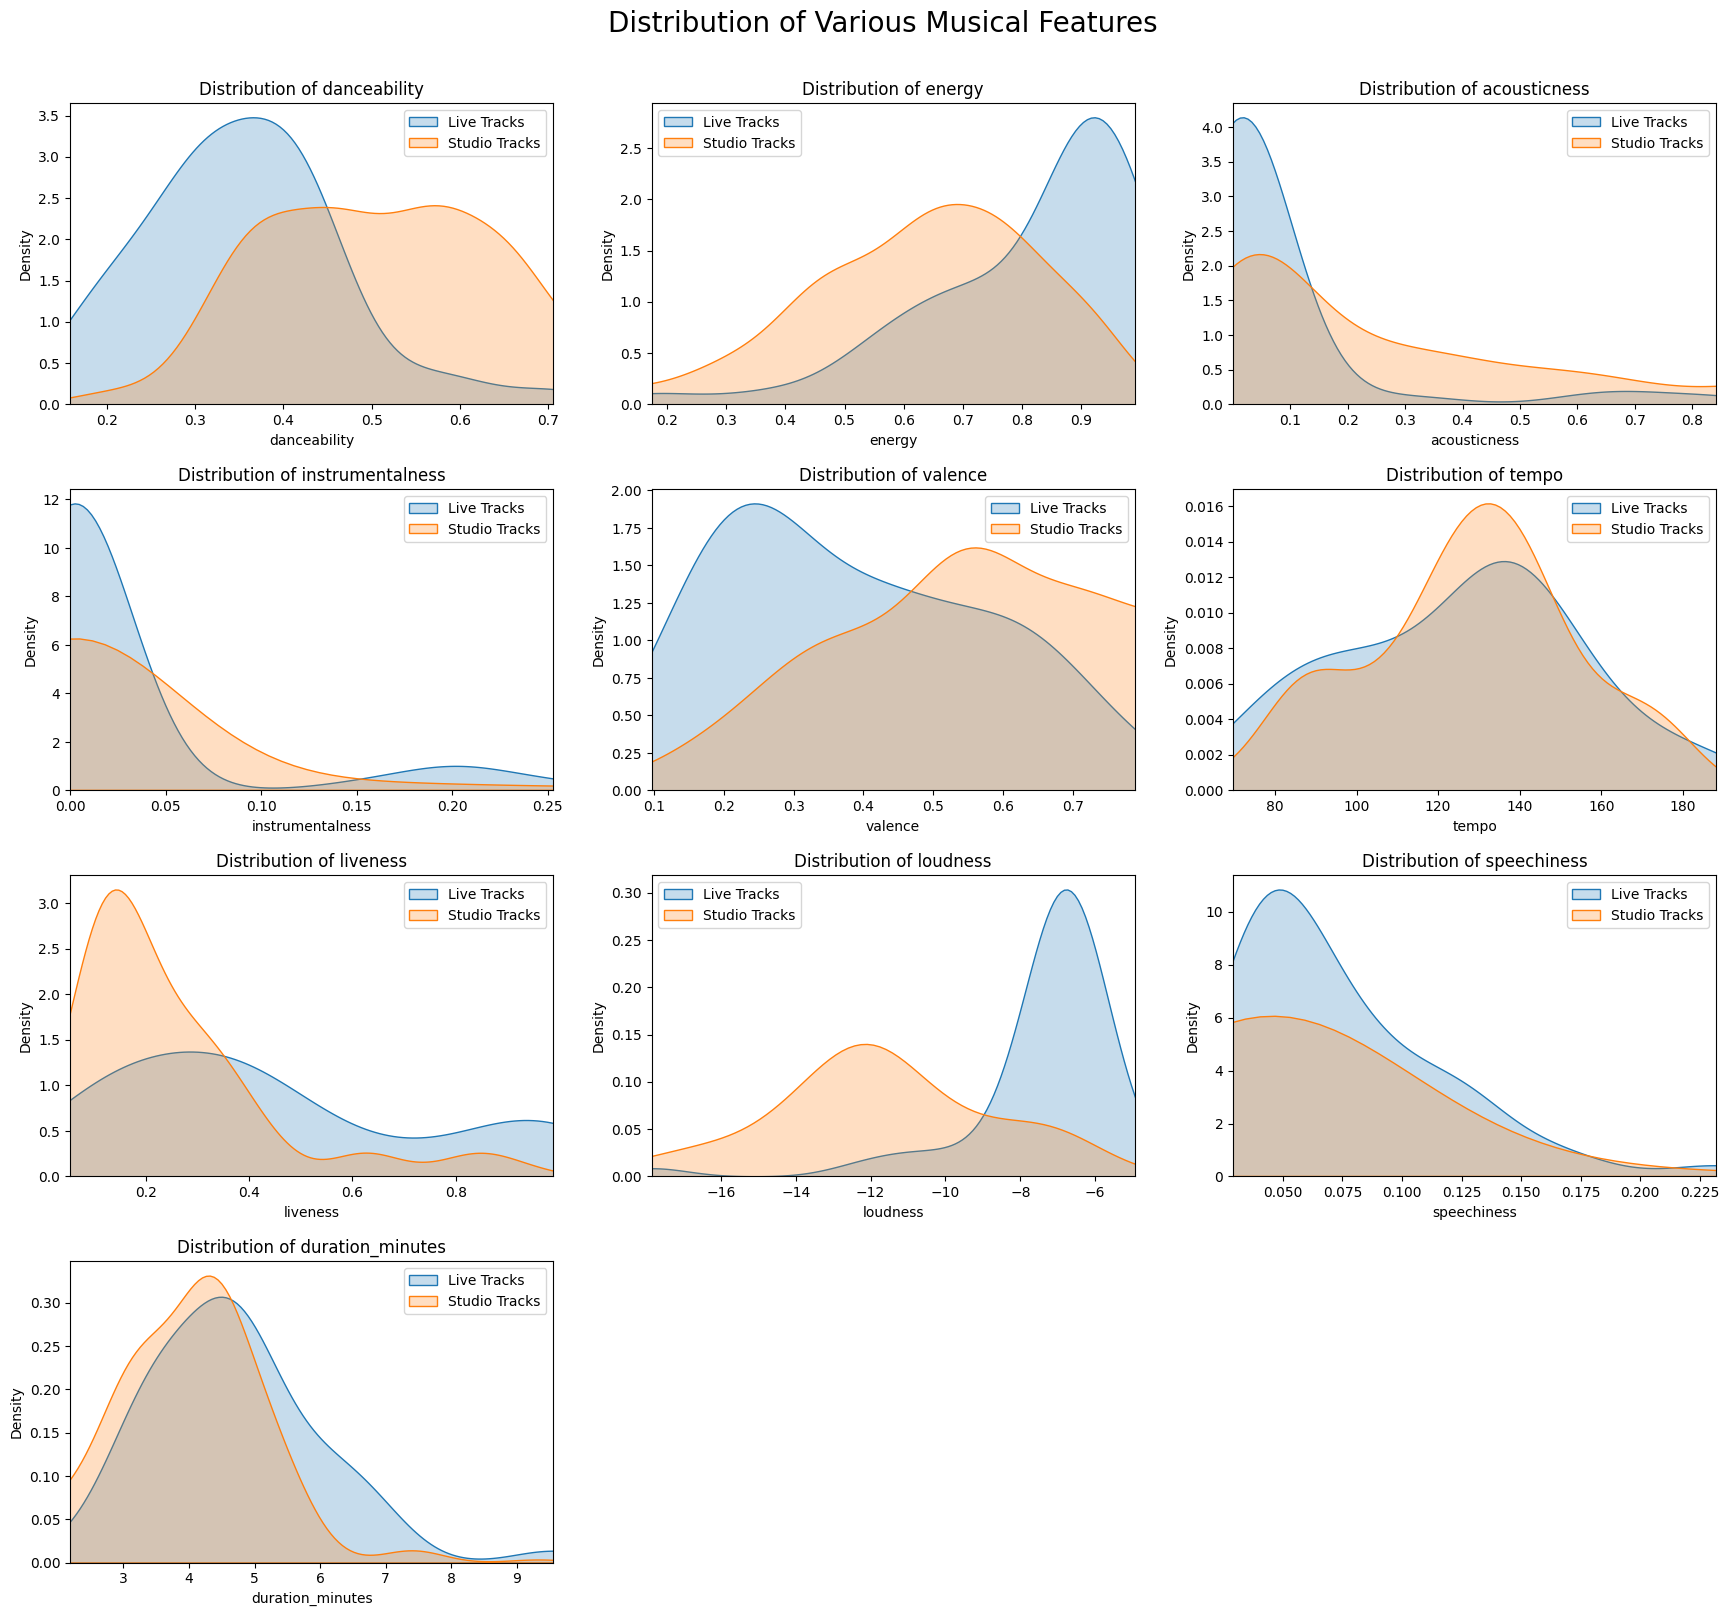

In [282]:
# Define the features
features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 
            'valence', 'tempo', 'liveness', 'loudness', 'speechiness', 'duration_minutes']

# Determine the grid size
num_features = len(features)
num_rows = (num_features + 2) // 3 

# Create a figure with multiple subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(18, num_rows * 4))
fig.tight_layout(pad=4.0)

# Overall title
plt.suptitle('Distribution of Various Musical Features', fontsize=20, y=1.02)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(features):
    sns.kdeplot(live_tracks[feature], label="Live Tracks", shade=True, ax=axes[i])
    sns.kdeplot(studio_tracks[feature], label="Studio Tracks", shade=True, ax=axes[i])
    
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].legend()
    
    # Set x-axis limits to show all values
    axes[i].set_xlim(live_tracks[feature].min(), live_tracks[feature].max())

# Hide any empty subplots (if features < grid spaces)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.show()

### Using Cohen's d Effects

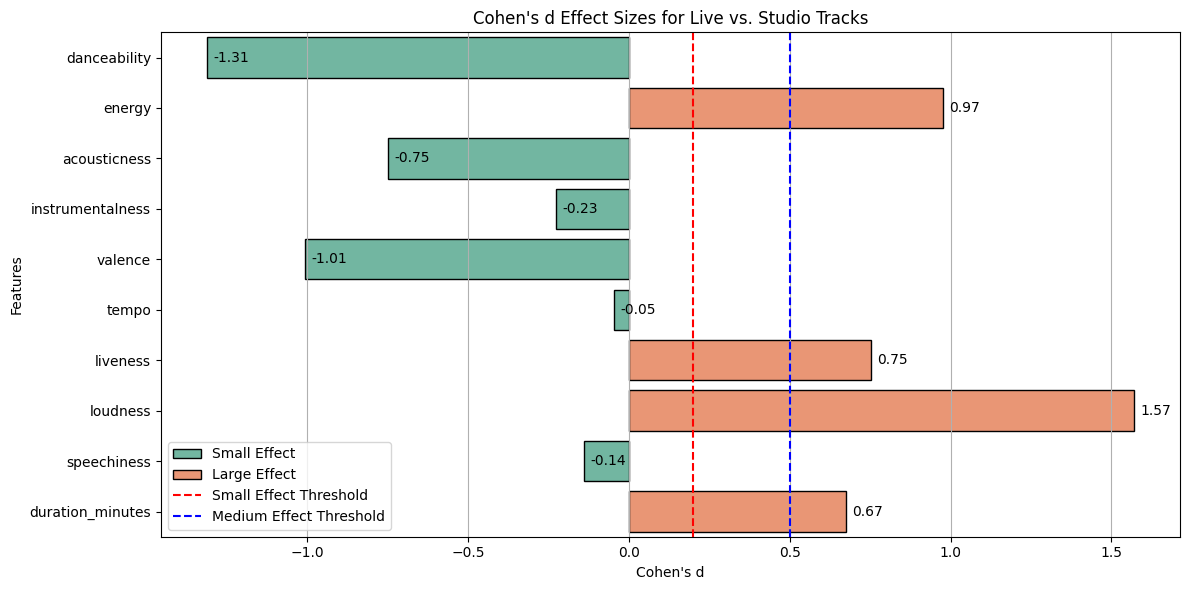

In [283]:
# Function to calculate Cohen's d
def cohen_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt((np.std(x) ** 2 + np.std(y) ** 2) / 2)

# Features to analyze
features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 
            'valence', 'tempo', 'liveness', 'loudness', 'speechiness', 'duration_minutes']  # Update with your actual feature names

# Create lists to store effect sizes and categories
effect_sizes = []
categories = []

# Calculate and categorize effect sizes for each feature
for feature in features:
    d = cohen_d(live_tracks[feature], studio_tracks[feature])
    effect_sizes.append(d)
    
    # Categorize based on Cohen's d value
    if d < 0.2:
        categories.append('Small Effect')
    elif 0.2 <= d < 0.5:
        categories.append('Medium Effect')
    elif d >= 0.5:
        categories.append('Large Effect')

# Create a DataFrame for plotting
effect_df = pd.DataFrame({
    'Feature': features,
    'Cohen\'s d': effect_sizes,
    'Category': categories
})

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='Feature', x="Cohen's d", hue="Category", data=effect_df, palette='Set2', dodge=False)

# Add threshold lines
plt.axvline(0.2, color='red', linestyle='--', label='Small Effect Threshold')
plt.axvline(0.5, color='blue', linestyle='--', label='Medium Effect Threshold')

# Add labels to each bar
for index, row in effect_df.iterrows():
    plt.text(row["Cohen's d"] + 0.02, index, round(row["Cohen's d"], 2), color='black', va="center")

# Add borders to the bars
for p in ax.patches:
    p.set_edgecolor('black')  # Set border color
    p.set_linewidth(1)         # Set border width

# Plot formatting
plt.title("Cohen's d Effect Sizes for Live vs. Studio Tracks")
plt.ylabel('Features')
plt.xlabel("Cohen's d")
plt.grid(axis='x')
plt.legend()
plt.tight_layout()
plt.show()


- Large Effect Sizes:
    - Not only is there quite a difference in terms of danceability, energy, valence, and loudness — live tracks are louder and more energetic, while studio tracks are more danceable and more positive in tone.

- Moderate Effect Sizes:
    - Acousticness, liveness and duration vary moderately, live tracks are, on average, less acoustic, ‘more live’, and slightly longer.

- Minimal Differences:
    - In both live and studio settings, there are very small differences in tempo, instrumentalness and speechiness.


Energy, volume and presence are all important in live performances, while in studio versions you tend to get more controlled danceability and upbeat qualities.

# **3. Which musical features make their songs popular?**

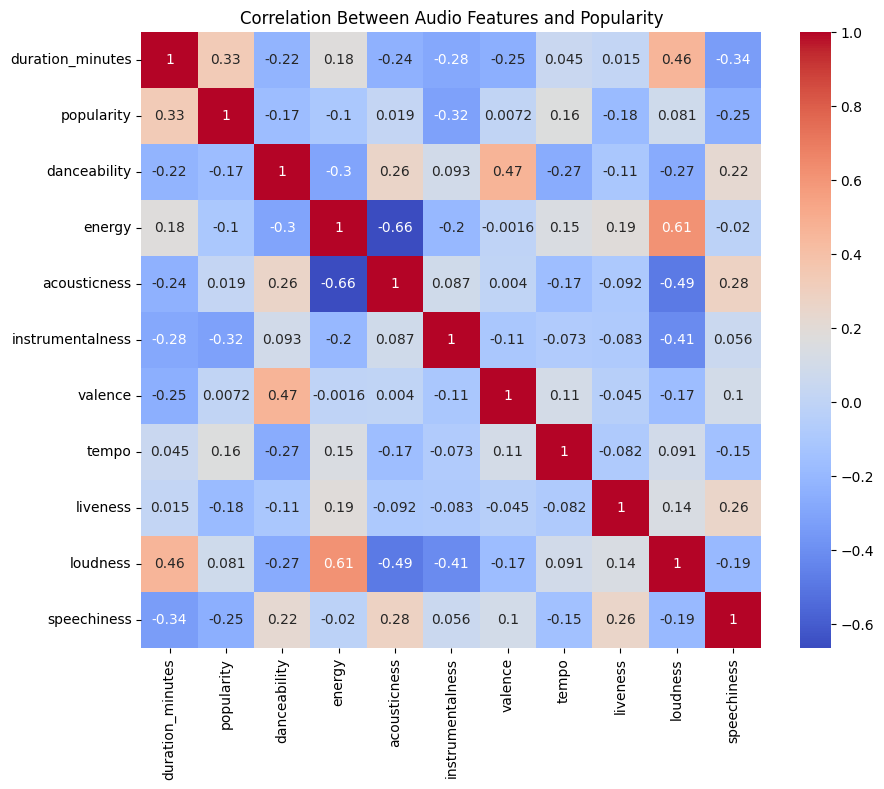

In [284]:
musical_features = df[['duration_minutes', 'popularity', 'danceability', 'energy', 
                     'acousticness', 'instrumentalness', 'valence', 
                     'tempo', 'liveness', 'loudness', 'speechiness']]

# Compute the correlation matrix
corr_matrix = musical_features.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features and Popularity')
plt.show()

- The data suggests that none of the musical features have a strong correlation with popularity.

- There's an identified moderate negative correlation (-0.32) between instrumentalness and popularity, but we should be wary as the instrumentalness distribution is skewed as can be seen on the earlier analysis.

# **4. How do their song lyrics reflect emotional sentiment?**

In [285]:
# Initialize the translator
translator = Translator()

# Function to classify sentiment based on polarity
def get_sentiment(text):
    result = translator.translate(text)
    translated_text = result.text
    blob = TextBlob(translated_text)
    polarity = blob.sentiment.polarity
    
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Add the sentiment column to the DataFrame
df['sentiment'] = df['lyrics_cleaned'].apply(get_sentiment)

# Count the occurrences of each sentiment
sentiment_counts = df['sentiment'].value_counts()

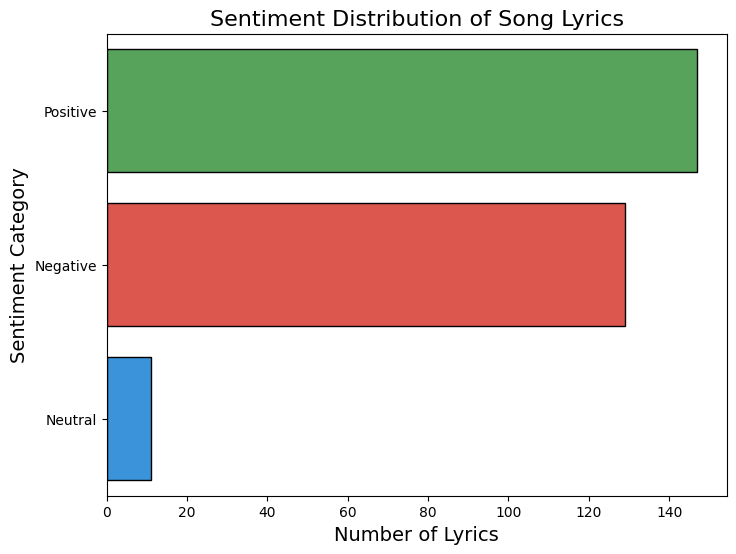

In [286]:
# Horizontal bar plot for sentiment distribution
plt.figure(figsize=(8, 6))

palette = {'Positive': '#4CAF50',  
           'Neutral': '#2196F3',   
           'Negative': '#F44336'}  

ax = sns.barplot(x=sentiment_counts.values, y=sentiment_counts.index, 
                 palette=palette)

plt.title('Sentiment Distribution of Song Lyrics', fontsize=16)
plt.xlabel('Number of Lyrics', fontsize=14)
plt.ylabel('Sentiment Category', fontsize=14)

for p in ax.patches:
    p.set_edgecolor('black') 
    p.set_linewidth(1)   

plt.show()

The majority of lyrics analyzed fall into the "Positive" category, with over 140 lyrics classified as having a positive sentiment with a slight difference with "Negative" category.

In [287]:
# Display a sample of the DataFrame
sample_df = df[['track_name', 'popularity', 'sentiment']].sample(10)
print(sample_df)

                                            track_name  popularity sentiment
106                                               Hula          17  Positive
124                                            Tama Ka          32  Positive
165                                Ang Huling El Bimbo          64  Positive
208                                           Hey, Jay          34  Negative
95                                      Scorpio Rising          27  Negative
142                                           Ha Ha Ha          28  Negative
5    Overdrive - Live at 2022 The Eraserheads Reuni...          23  Negative
15   Sembreak - Live at 2022 The Eraserheads Reunio...          20  Negative
127                                            Salamin          27  Positive
137                                      Milk An Money          18  Negative


# **5. How Eraserheads' musical features changed overtime?**

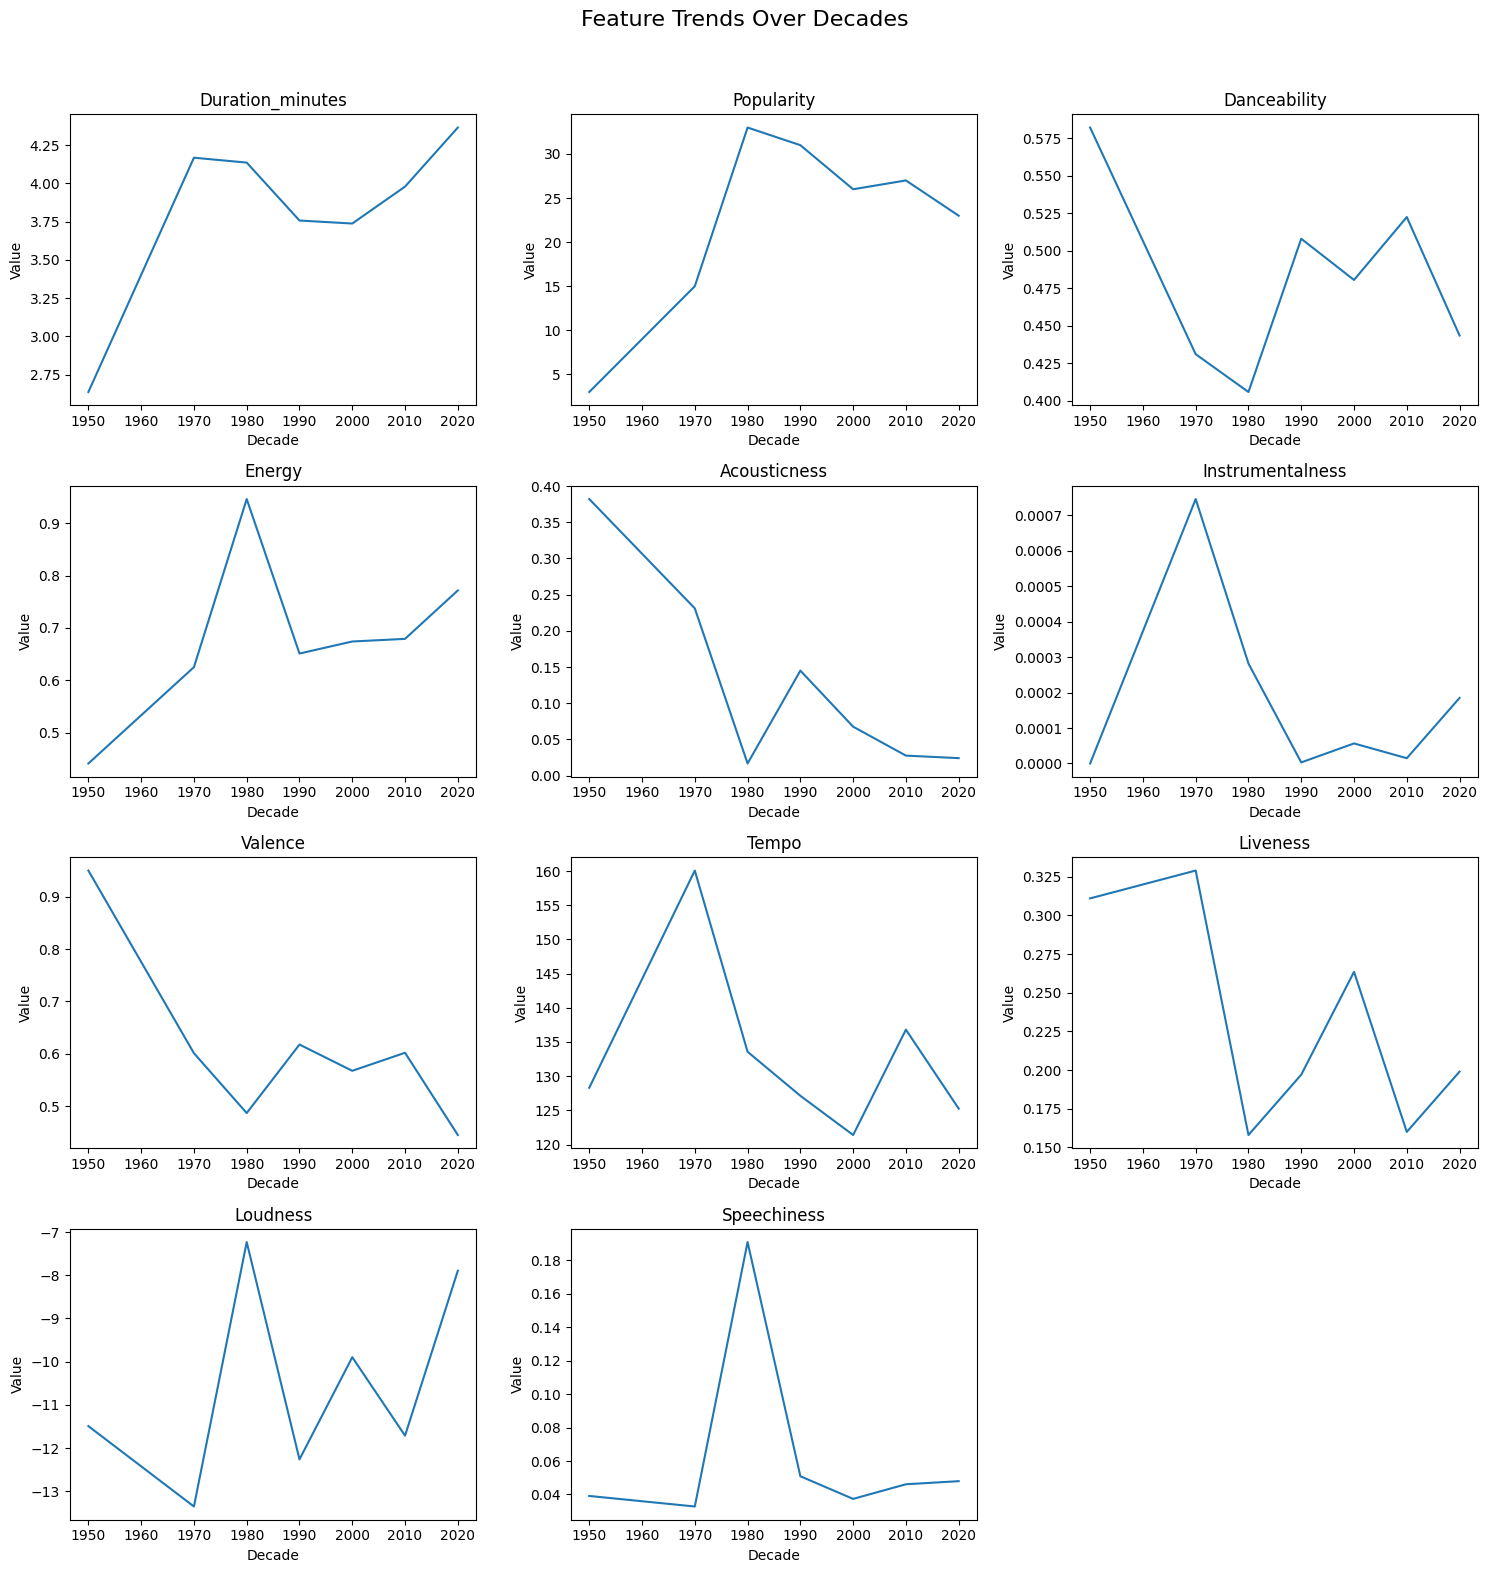

In [288]:
def plot_all_decade_trends(df, feature_columns):
    # Group by decades
    df['decade'] = df['track_release_date'].dt.year // 10 * 10

    # Calculate skewness and decide on statistic to use
    skewness = df[feature_columns].skew()
    decade_summary = pd.DataFrame()

    for feature in feature_columns:
        if skewness[feature] < -0.5 or skewness[feature] > 0.5:
            # Use median if skewness is significant
            summary = df.groupby('decade')[feature].median()
        else:
            # Use mean if skewness is not significant
            summary = df.groupby('decade')[feature].mean()
        
        decade_summary[feature] = summary

    # Plot each feature in a small subplot
    num_features = len(feature_columns)
    cols = 3  # Define number of columns for subplots
    rows = (num_features + cols - 1) // cols  # Calculate rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
    fig.suptitle('Feature Trends Over Decades', fontsize=16)
    axes = axes.flatten()

    for i, feature in enumerate(feature_columns):
        decade_summary[feature].plot(ax=axes[i], title=feature.capitalize())
        axes[i].set_xlabel('Decade')
        axes[i].set_ylabel('Value')
    
    # Hide any empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Define your feature columns
feature_columns = [
    'duration_minutes', 'popularity', 'danceability', 'energy',
    'acousticness', 'instrumentalness', 'valence',
    'tempo', 'liveness', 'loudness', 'speechiness'
]

# Call the plotting function with your DataFrame and feature columns
plot_all_decade_trends(df, feature_columns)


- Their music has gone from a bit longer, more acoustic driven songs to more polished and electronically produced songs. It could be a response to the changing music industry and the advent of recording technology, or it could be a conscious change in their musical identity.

- The drop in valence indicates that the band looked at more serious, more somber, more introspective themes as time went on. There’s a possibility that they have grown out of their songwriting and are trying to communicate something more.

- The trends of the danceability, energy, and instrumentalness fluctuate, indicating that the band wasn’t too tight in the stick-to-one style, rather, they tried different genres, rock, ballads, or maybe they even tried electronic or alternative.

## **6. What are the frequent words used in their overall song lyrics?**

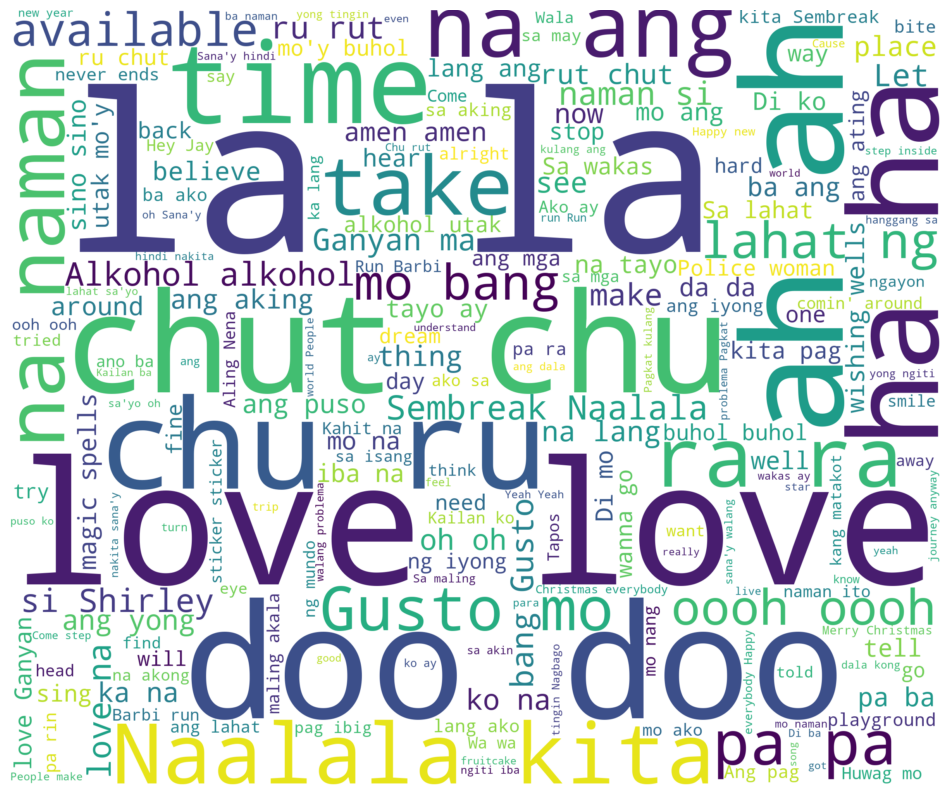

In [289]:
corpus = ' '.join(df['lyrics_cleaned'])
corpus = corpus.replace('.', '. ')

# Generate the WordCloud
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2400, height=2000).generate(corpus)

# Display the WordCloud
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


- Their song lyrics are conversational and storytelling, hints such as "Gusto mo" (do you want), "Naalala kita" (I remember you), and "lahat ng" (all of).

- They're bilingual (Eng and Fil) when it comes to writing lyrics.

- One of the most word that shows up in their song is "love", it suggests that they explore the contrasts and conflicts of relationships.

- Playful words such as "la la", "chu ru" and "doo doo" are sounds that give the impression of how fun, playful, and energetic Eraserheads songs can be.

Their song lyrics most probably talks about relationships between people, whether in positive or negative tone, as the most recurring words in their song lyrics suggest so.

# **Conclusion**

Eraserheads’ music is special because it’s equally emotional and resonant, culturally significant, and it’s also an artistic evolution.

It’s not because of the traditional musical features, it’s because of the way they can connect, through relatable themes and nostalgic appeal.

Their sound started out in an acoustic driven simplicity, and over time, evolving to more polished electronic influences, it might be becaue of both industry change and personal growth.

Their songs deal mostly with love and relationships, as with universal narratives in a distinctly Filipino touch-


***...becoming a band that will be remembered as one of the most enduring and influential in the country’s musical history.***